In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model 
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()



('2017-08-23',)

<function matplotlib.pyplot.show(close=None, block=None)>

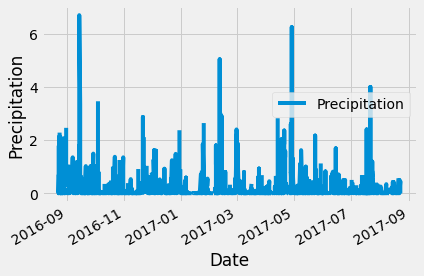

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
delta = dt.timedelta(days=365)
query_date = start_date - delta

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_date).order_by(measurement.date.desc()).all()
precip

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])
datetime_series = pd.to_datetime(precip_df['Date'])
datetime_index  = pd.DatetimeIndex(datetime_series.values)
precip_df.set_index(datetime_index,inplace=True)    
precip_df.head()

# Sort the dataframe by date
precip_sorted_df = precip_df.sort_values(by='Date')
precip_sorted_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

# not sure if Dates can be converted to datetime after it is set 
# as index.  all examples were done before, so it's done above

precip_sorted_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show


In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number stations in the dataset
# Create a SQL query to load the entire table
base.classes.measurement

sqlalchemy.ext.automap.measurement

In [48]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count()
station_count


19550

In [50]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average
# temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

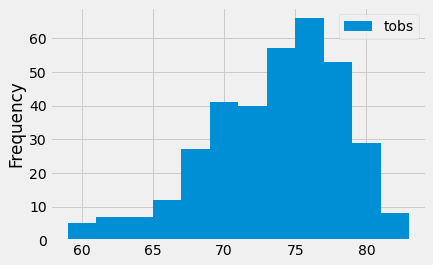

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= '2016-08-23').all()

busy_station_temp_obs = pd.DataFrame(results, columns=['tobs'])
busy_station_temp_obs.plot.hist(bins=12)
plt.show

# Close session

In [ ]:
# Close Session
session.close()